## <font color=blue> US Hate crimes analysis :</font>
    
   
### 1. Hate crime - volume and bias 
    Hate crime volume trends over past 10 years
    Hate crime bias trends over past 10 years 

### 2. Hate crime - offense types
    Most frequent offense types
    Trends for top five offenses 
    
### 3. Hate crimes - State/Territory-wise analysis
    States impacted most
    What locations have a higher chance for hate crimes
    
### 4. Hate crimes - seasonal trends
    Fluctuation of hate crime rates across various seasons


## <font color=blue> Data Sources </font>
### 1. FBI Hate-Crime data 2017  (crime incidents records for 1997 – 2017 )
http://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/hate_crime.zip


### 2. US Govt portal 
https://api.usa.gov/crime/fbi/sapi/

Below endpoints were used to collect additional inputs for agencies/state's total crime and population data

/api/participation/agencies/{ori}

/api/summarized/agencies/{ori}/offenses/{since}/{until}

/api/estimates/states/{state}/{since}/{until}


API info available at https://crime-data-explorer.fr.cloud.gov/api


In [1]:
import pandas as pd
from pathlib import Path
import json
import requests
import numpy as np
import time
from  matplotlib import pyplot as plt

# Section 1

In [2]:
# Importing data from updated csv file
file = "../input_files/hate_crime_v3.csv"

m_df = pd.read_csv(file, low_memory = False)
m_df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'DATA_MONTH', 'ORI', 'PUB_AGENCY_NAME',
       'PUB_AGENCY_UNIT', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME',
       'DIVISION_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE',
       'POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'ADULT_VICTIM_COUNT',
       'JUVENILE_VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'BIAS_TYPE', 'VICTIM_TYPES',
       'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],
      dtype='object')

In [3]:
# selecting data for year 2007 onwards
m_df = m_df.loc[m_df['DATA_YEAR']>=2007, :]
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72894 entries, 121300 to 194193
Data columns (total 30 columns):
INCIDENT_ID                 72894 non-null int64
DATA_YEAR                   72894 non-null int64
DATA_MONTH                  72894 non-null object
ORI                         72894 non-null object
PUB_AGENCY_NAME             72894 non-null object
PUB_AGENCY_UNIT             1897 non-null object
AGENCY_TYPE_NAME            72894 non-null object
STATE_ABBR                  72894 non-null object
STATE_NAME                  72894 non-null object
DIVISION_NAME               72894 non-null object
REGION_NAME                 72894 non-null object
POPULATION_GROUP_CODE       72894 non-null object
POPULATION_GROUP_DESC       72894 non-null object
INCIDENT_DATE               72894 non-null object
ADULT_VICTIM_COUNT          29915 non-null float64
JUVENILE_VICTIM_COUNT       29813 non-null float64
TOTAL_OFFENDER_COUNT        72894 non-null int64
ADULT_OFFENDER_COUNT        28704 non

In [4]:
disable = m_df.loc[m_df["BIAS_DESC"] == "Anti-Disability"]
disable_count = disable["DATA_YEAR"].value_counts()
disable_percent = (disable["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100

gender = m_df.loc[m_df["BIAS_DESC"] == "Anti-Gender"]
gender_count = gender["DATA_YEAR"].value_counts()
gender_percent = (gender["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100

race = m_df.loc[m_df["BIAS_DESC"] == "Anti-Race/Ethnicity"]
race_count = race["DATA_YEAR"].value_counts()
race_percent = (race["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100

religion = m_df.loc[m_df["BIAS_DESC"] == "Anti-Religion"]
religion_count = religion["DATA_YEAR"].value_counts()
religion_percent = (religion["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100

sex = m_df.loc[m_df["BIAS_DESC"] == "Anti-Sexual Orientation"]
sex_count = sex["DATA_YEAR"].value_counts()
sex_percent = (sex["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100


In [5]:
years = m_df["DATA_YEAR"].unique()
years_count =m_df["DATA_YEAR"].value_counts()
years_count

2008    8039
2007    7625
2017    7334
2010    6628
2009    6612
2012    6593
2011    6299
2016    6263
2013    6044
2015    5860
2014    5597
Name: DATA_YEAR, dtype: int64

In [6]:
bias_df = pd.DataFrame({"Year": years,
                        "Anti-Disability": disable_count,
                       "Anti-Gender": gender_count,
                       "Anti-Race/Ethnicity": race_count,
                       "Anti-Religion": religion_count,
                       "Anti-Sexual Orientation": sex_count})
bias_df

,Year,Anti-Disability,Anti-Gender,Anti-Race/Ethnicity,Anti-Religion,Anti-Sexual Orientation
2007,2007,59,NaN,4892,1397,1277
2008,2008,93,NaN,5057,1552,1337
2009,2009,94,NaN,3992,1298,1228
2010,2010,43,NaN,3985,1322,1278
2011,2011,64,NaN,3688,1237,1310
2012,2012,110,6.0,3858,1319,1300
2013,2013,93,28.0,3584,1048,1291
2014,2014,96,74.0,3293,1031,1103
2015,2015,75,65.0,3330,1249,1141
2016,2016,101,49.0,3585,1304,1224


In [7]:
m_year_df = pd.DataFrame({"Total": years_count})
m_year_df = m_year_df.sort_index()
m_year_df.head()

,Total
2007,7625
2008,8039
2009,6612
2010,6628
2011,6299


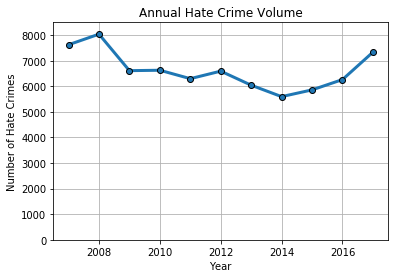

In [8]:
plt.plot(years, m_year_df.Total, linewidth=3, marker='o', markeredgecolor='black')
plt.grid()
plt.title("Annual Hate Crime Volume")
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")
plt.ylim(0,8500)
plt.savefig("../output_files/fig1.1(Annual_Hate_Crime_Volume).png")

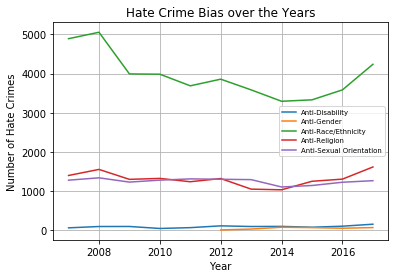

In [9]:
plt.plot(years, bias_df["Anti-Disability"])
plt.plot(years, bias_df["Anti-Gender"])
plt.plot(years, bias_df["Anti-Race/Ethnicity"])
plt.plot(years, bias_df["Anti-Religion"])
plt.plot(years, bias_df["Anti-Sexual Orientation"])
plt.grid()
plt.legend(fontsize="x-small", loc=0)
plt.title("Hate Crime Bias over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")
plt.savefig("../output_files/fig1.2(Hate_Crime_Bias_Over_Year).png")

Text(0, 0.5, 'Number of Hate Crimes')

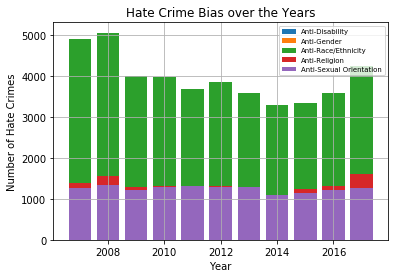

In [10]:
labels = ["Anti-Disability", "Anti-Gender", "Anti-Race/Ethnicity", "Anti-Religion", "Anti-Sexual Orientation"]

plt.bar(years, bias_df["Anti-Disability"])
plt.bar(years, bias_df["Anti-Gender"])
plt.bar(years, bias_df["Anti-Race/Ethnicity"])
plt.bar(years, bias_df["Anti-Religion"])
plt.bar(years, bias_df["Anti-Sexual Orientation"])
plt.grid()
plt.legend(fontsize="x-small", loc=0, labels=labels)
plt.title("Hate Crime Bias over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")

In [11]:
# labels = ["Anti-Disability", "Anti-Gender", "Anti-Race/Ethnicity", "Anti-Religion", "Anti-Sexual Orientation"]

# plt.bar(years, bias_percent_df["Anti-Disability"])
# plt.bar(years, bias_percent_df["Anti-Gender"])
# plt.bar(years, bias_percent_df["Anti-Race/Ethnicity"])
# plt.bar(years, bias_percent_df["Anti-Religion"])
# plt.bar(years, bias_percent_df["Anti-Sexual Orientation"])
# plt.grid()
# plt.legend(fontsize="x-small", loc=0, labels=labels)
# plt.title("Hate Crime Bias over the Years")
# plt.xlabel("Year")
# plt.ylabel("Number of Hate Crimes")

# Section 2

In [12]:
#2.	What is the trend of hate crime offense types over years? (Offense_Name)

#The top 10 offense types over the review period are 
# 1.	Destruction/Damage/Vandalism of Property    	22,436
# 2.	Intimidation                                			17,902
# 3.	Simple Assault                             			15,128
# 4.	Aggravated Assault                           		7,167
# 5.	Multiple                                     			3,478
# 6.	Other                                        			2,923
# 7.	Robbery                                      			1,275
# 8.	Burglary/Breaking & Entering                 		1,185
# 9.	All Other Larceny                            		 955
# 10.	Drug/Narcotic Violations                      		445

#The top five categories are plotted by year to show that all cateogories are trending upward, except a leveling off for
#simple assault numbers.  This may be that assault types are escalating from simple to aggravated which has seen a rise. 

#Property damage as seen the shaprest rise and is the largest category.

In [13]:
%matplotlib inline

In [14]:
q2_df = pd.read_csv('../input_files/hate_crime_v3.csv', low_memory = False)
q2_df.head()

,INCIDENT_ID,DATA_YEAR,DATA_MONTH,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,BIAS_TYPE,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,August,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
1,3016,1991,September,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Race/Ethnicity,Anti-White,Individual,S,S
2,43,1991,July,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
3,44,1991,December,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Race/Ethnicity,Anti-White,Individual,M,S
4,3017,1991,December,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-Race/Ethnicity,Anti-White,Individual,S,S


In [15]:
# Removing data before 2007
q2_df = q2_df.loc[q2_df['DATA_YEAR']>=2007, :]


In [16]:
print(q2_df.columns)

Index(['INCIDENT_ID', 'DATA_YEAR', 'DATA_MONTH', 'ORI', 'PUB_AGENCY_NAME',
       'PUB_AGENCY_UNIT', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME',
       'DIVISION_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE',
       'POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'ADULT_VICTIM_COUNT',
       'JUVENILE_VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'BIAS_TYPE', 'VICTIM_TYPES',
       'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],
      dtype='object')


In [17]:
# Reorganizing data frame with only the variables needed for question 2 and groupby year.
# df_grouped = organized_df.groupby('DATA_YEAR').count()
# df_grouped.head(11)

q2_organized_df = q2_df[["DATA_YEAR","OFFENSE_NAME","MULTIPLE_OFFENSE","BIAS_DESC"]]
print(q2_organized_df['BIAS_DESC'].unique())
print(len(q2_organized_df['OFFENSE_NAME'].unique()))
print(q2_organized_df['MULTIPLE_OFFENSE'].unique())

['Anti-Disability' 'Anti-Race/Ethnicity' 'Anti-Sexual Orientation'
 'Anti-Religion' 'Anti-Gender']
239
['S' 'M']


In [18]:
# Recode to "Multiple" for records with "M" in MULTIPLE_OFFENSE column to reduce the unique values in OFFENSE_NAME.
# Or can recode Multiple for any in the column with ";" which is only used to list multiples.
# Example from StackOverflow... df.loc[df.col1 == 'Yes', 'col2'] = ''
# Another example df.loc[df.ID == 103, 'FirstName'] = "Matt"
q2_organized_df.loc[q2_organized_df.MULTIPLE_OFFENSE == 'M' , 'OFFENSE_NAME'] = 'Multiple'

C:\Users\avise\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
q2_organized_df.head(20)

,DATA_YEAR,OFFENSE_NAME,MULTIPLE_OFFENSE,BIAS_DESC
121300,2007,Simple Assault,S,Anti-Disability
121301,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity
121302,2007,Aggravated Assault,S,Anti-Sexual Orientation
121303,2007,Simple Assault,S,Anti-Sexual Orientation
121304,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity
121305,2007,Aggravated Assault,S,Anti-Race/Ethnicity
121306,2007,Aggravated Assault,S,Anti-Race/Ethnicity
121307,2007,Simple Assault,S,Anti-Race/Ethnicity
121308,2007,Simple Assault,S,Anti-Sexual Orientation
121309,2007,Destruction/Damage/Vandalism of Property,S,Anti-Race/Ethnicity


In [20]:
print(q2_organized_df['OFFENSE_NAME'].value_counts())
#There are 47 categories.  Report top 10, recode smaller categories to Other

Destruction/Damage/Vandalism of Property       22436
Intimidation                                   17902
Simple Assault                                 15128
Aggravated Assault                              7167
Multiple                                        3478
Robbery                                         1275
Burglary/Breaking & Entering                    1185
All Other Larceny                                955
Drug/Narcotic Violations                         445
Theft From Motor Vehicle                         347
Shoplifting                                      334
Arson                                            326
Theft From Building                              249
Not Specified                                    246
Motor Vehicle Theft                              213
Drug Equipment Violations                        130
False Pretenses/Swindle/Confidence Game          130
Rape                                             112
Weapon Law Violations                         

In [21]:
# Rename smaller categories to "Other" to reduce number of reporting categories for better visualization.

q2_organized_df = q2_organized_df.replace(
    {"Theft From Motor Vehicle": "Other", "Shoplifting": "Other", "Arson": "Other", "Theft From Building": "Other", 
     "Not Specified": "Other", "Motor Vehicle Theft": "Other", "False Pretenses/Swindle/Confidence Game": "Other",
    "Drug Equipment Violations": "Other", "Rape": "Other", "Weapon Law Violations": "Other", "Counterfeiting/Forgery": "Other",
    "Fondling": "Other", "Impersonation": "Other", "Credit Card/Automated Teller Machine Fraud": "Other", 
     "Murder and Nonnegligent Manslaughter": "Other", "Theft of Motor Vehicle Parts or Accessories": "Other", 
     "Stolen Property Offenses": "Other", "Kidnapping/Abduction": "Other", "Embezzlement": "Other", "Sodomy": "Other", 
    "Extortion/Blackmail": "Other", "Sexual Assault With An Object": "Other", "Pocket-picking": "Other", 
    "Pornography/Obscene Material": "Other", "Statutory Rape": "Other", "Wire Fraud": "Other", "Identity Theft": "Other",
    "Purse-snatching": "Other", "Theft From Coin-Operated Machine or Device": "Other", "Assisting or Promoting Prostitution": "Other",
   "Incest": "Other", "Human Trafficking, Commercial Sex Acts": "Other", "Hacking/Computer Invasion": "Other", 
    "Purchasing Prostitution": "Other", "Prostitution": "Other", "Betting/Wagering": "Other", "Bribery": "Other",
    "Negligent Manslaughter": "Other"})

print(q2_organized_df['OFFENSE_NAME'].value_counts())

Destruction/Damage/Vandalism of Property    22436
Intimidation                                17902
Simple Assault                              15128
Aggravated Assault                           7167
Multiple                                     3478
Other                                        2923
Robbery                                      1275
Burglary/Breaking & Entering                 1185
All Other Larceny                             955
Drug/Narcotic Violations                      445
Name: OFFENSE_NAME, dtype: int64


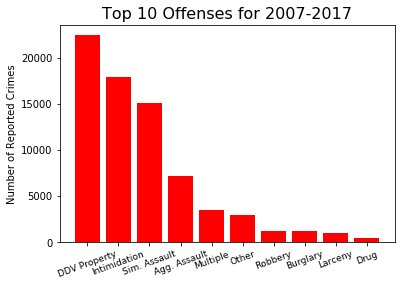

In [22]:
#Bar chart for 2007-2017 total number of crimes by offense name(type)
x = np.arange(10)
y = [22436, 17902, 15128, 7167, 3478, 2923, 1275, 1185, 955, 445]

plt.xticks(x, ('DDV Property', 'Intimidation', 'Sim. Assault', 'Agg. Assault', 'Multiple', 'Other', 'Robbery', 'Burglary', 'Larceny', 'Drug'), rotation=(20), fontsize=9)

plt.bar(x, y, color='r')
plt.title("Top 10 Offenses for 2007-2017", fontsize=16)
plt.ylabel('Number of Reported Crimes')
plt.savefig("../output_files/fig2.1(Q2_Top_10_Offenses).png")

In [23]:
print(q2_organized_df['BIAS_DESC'].value_counts())

Anti-Race/Ethnicity        43502
Anti-Religion              14371
Anti-Sexual Orientation    13753
Anti-Disability              980
Anti-Gender                  288
Name: BIAS_DESC, dtype: int64


In [24]:
q2_df_grouped = q2_organized_df.groupby('DATA_YEAR')
q2_df_grouped['BIAS_DESC'].value_counts()

DATA_YEAR  BIAS_DESC              
2007       Anti-Race/Ethnicity        4892
           Anti-Religion              1397
           Anti-Sexual Orientation    1277
           Anti-Disability              59
2008       Anti-Race/Ethnicity        5057
           Anti-Religion              1552
           Anti-Sexual Orientation    1337
           Anti-Disability              93
2009       Anti-Race/Ethnicity        3992
           Anti-Religion              1298
           Anti-Sexual Orientation    1228
           Anti-Disability              94
2010       Anti-Race/Ethnicity        3985
           Anti-Religion              1322
           Anti-Sexual Orientation    1278
           Anti-Disability              43
2011       Anti-Race/Ethnicity        3688
           Anti-Sexual Orientation    1310
           Anti-Religion              1237
           Anti-Disability              64
2012       Anti-Race/Ethnicity        3858
           Anti-Religion              1319
           Anti-Sex

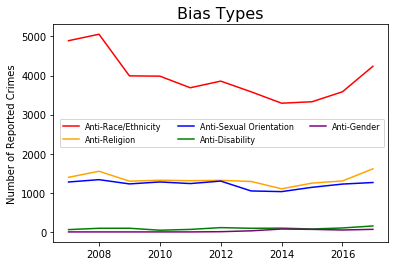

In [25]:
bias_desc_trend_df = pd.DataFrame({'x': (2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017), 
    'Anti-Race/Ethnicity': (4892, 5057, 3992, 3985, 3688, 3858, 3584, 3293, 3330, 3585, 4238), 'Anti-Religion': (1397, 1552, 1298, 1322, 1310, 1319, 1291, 1103, 1249, 1304, 1614), 'Anti-Sexual Orientation': (1277, 1337, 1228, 1278, 1237, 1300, 1048, 1031, 1141, 1224, 1264), 'Anti-Disability': (59, 93, 94, 43, 64, 110, 93, 96, 75, 101, 152), 'Anti-Gender': (0,0,0,0,0, 6, 28, 74, 65, 49, 66)})
plt.plot('x', 'Anti-Race/Ethnicity', data=bias_desc_trend_df, marker='', color='red')
plt.plot('x', 'Anti-Religion', data=bias_desc_trend_df, marker='', color='orange')
plt.plot('x', 'Anti-Sexual Orientation', data=bias_desc_trend_df, marker='', color='blue')
plt.plot('x', 'Anti-Disability', data=bias_desc_trend_df, marker='', color='green')
plt.plot('x', 'Anti-Gender', data=bias_desc_trend_df, marker='', color='purple')
plt.title("Bias Types", fontsize=16)
plt.ylabel('Number of Reported Crimes')
plt.legend(ncol=3, fontsize=8)
#plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1.00),
          #ncol=1, fancybox=True, shadow=True, fontsize=12)
plt.savefig("../output_files/fig2.2(Q2_Bias_Types).png")

In [26]:
q2_offense_name_trend_df = q2_df_grouped['OFFENSE_NAME'].value_counts()
q2_offense_name_trend_df = pd.DataFrame(q2_offense_name_trend_df)
q2_offense_name_trend_df

# Make a line graph with this data.  x = years, y = Offense name, there should be 10 lines

OFFENSE_NAME
DATA_YEAR OFFENSE_NAME                                          
2007      Destruction/Damage/Vandalism of Property          2632
          Intimidation                                      1892
          Simple Assault                                    1329
          Aggravated Assault                                 765
          Multiple                                           429
          Other                                              220
          Robbery                                            151
          Burglary/Breaking & Entering                       111
          All Other Larceny                                   93
          Drug/Narcotic Violations                             3
2008      Destruction/Damage/Vandalism of Property          2786
          Intimidation                                      2057
          Simple Assault                                    1459
          Aggravated Assault                                 727
          Multiple                                           430
          Other                                              239
          Robbery                                            120
          Burglary/Breaking & Entering                       115
          All Other Larceny                                  100
          Drug/Narcotic Violations                             6
2009      Destruction/Damage/Vandalism of Property          2186
          Intimidation                                      1577
          Simple Assault                                    1393
          Aggravated Assault                                 629
          Multiple                                           414
          Other                                              158
          Robbery                                             91
          Burglary/Breaking & Entering                        87
          All Other Larceny                                   66
          Drug/Narcotic Violations                            11
...                                                          ...
2015      Destruction/Damage/Vandalism of Property          1590
          Intimidation                                      1430
          Simple Assault                                    1377
          Aggravated Assault                                 625
          Other                                              266
          Multiple                                           216
          Burglary/Breaking & Entering                       120
          Robbery                                            112
          All Other Larceny                                   98
          Drug/Narcotic Violations                            26
2016      Destruction/Damage/Vandalism of Property          1782
          Intimidation                                      1528
          Simple Assault                                    1411
          Aggravated Assault                                 628
          Other                                              329
          Multiple                                           266
          Robbery                                            111
          Burglary/Breaking & Entering                        92
          All Other Larceny                                   73
          Drug/Narcotic Violations                            43
2017      Destruction/Damage/Vandalism of Property          2185
          Intimidation                                      1738
          Simple Assault                                    1379
          Aggravated Assault                                 736
          Other                                              455
          Multiple                                           317
          Robbery                                            141
          All Other Larceny                                  139
          Drug/Narcotic Violations                           132
          Burglary/Bre

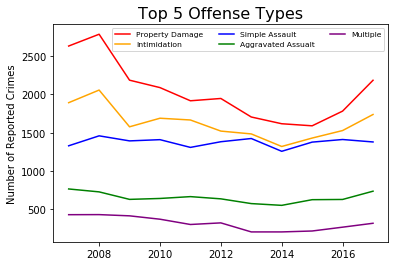

In [27]:
offense_name_trend_df = pd.DataFrame({'x': (2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017), 
    'Property Damage': (2632, 2786, 2186, 2089, 1917, 1947, 1705, 1617, 1590, 1782, 2185), 'Intimidation': (1892, 2057, 1577, 1689, 1666, 1521, 1484, 1320, 1430, 1528, 1738), 'Simple Assault': (1329, 1459, 1393, 1409, 1308, 1382, 1424, 1257, 1377, 1411, 1379), 'Aggravated Assualt': (765, 727, 629, 641, 665, 636, 574, 551, 625, 628, 736), 'Multiple': (429, 430, 414, 370, 301, 322, 204, 204, 216, 266, 317)})
plt.plot('x', 'Property Damage', data=offense_name_trend_df, marker='', color='red')
plt.plot('x', 'Intimidation', data=offense_name_trend_df, marker='', color='orange')
plt.plot('x', 'Simple Assault', data=offense_name_trend_df, marker='', color='blue')
plt.plot('x', 'Aggravated Assualt', data=offense_name_trend_df, marker='', color='green')
plt.plot('x', 'Multiple', data=offense_name_trend_df, marker='', color='purple')
plt.title("Top 5 Offense Types", fontsize=16)
plt.ylabel('Number of Reported Crimes')
plt.legend(ncol=3, fontsize=7.6)
          
plt.savefig("../output_files/fig2.3(Q2_Top_5_Offense_Types).png")

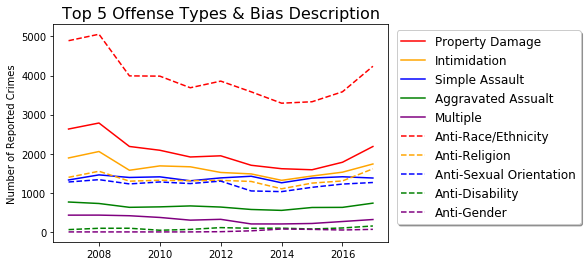

In [28]:
offense_name_trend_df = pd.DataFrame({'x': (2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017), 
    'Property Damage': (2632, 2786, 2186, 2089, 1917, 1947, 1705, 1617, 1590, 1782, 2185), 'Intimidation': (1892, 2057, 1577, 1689, 1666, 1521, 1484, 1320, 1430, 1528, 1738), 'Simple Assault': (1329, 1459, 1393, 1409, 1308, 1382, 1424, 1257, 1377, 1411, 1379), 'Aggravated Assualt': (765, 727, 629, 641, 665, 636, 574, 551, 625, 628, 736), 'Multiple': (429, 430, 414, 370, 301, 322, 204, 204, 216, 266, 317)})
plt.plot('x', 'Property Damage', data=offense_name_trend_df, marker='', color='red')
plt.plot('x', 'Intimidation', data=offense_name_trend_df, marker='', color='orange')
plt.plot('x', 'Simple Assault', data=offense_name_trend_df, marker='', color='blue')
plt.plot('x', 'Aggravated Assualt', data=offense_name_trend_df, marker='', color='green')
plt.plot('x', 'Multiple', data=offense_name_trend_df, marker='', color='purple')
plt.plot('x', 'Anti-Race/Ethnicity', data=bias_desc_trend_df, marker='', color='red', linestyle='dashed')
plt.plot('x', 'Anti-Religion', data=bias_desc_trend_df, marker='', color='orange', linestyle='dashed')
plt.plot('x', 'Anti-Sexual Orientation', data=bias_desc_trend_df, marker='', color='blue', linestyle='dashed')
plt.plot('x', 'Anti-Disability', data=bias_desc_trend_df, marker='', color='green', linestyle='dashed')
plt.plot('x', 'Anti-Gender', data=bias_desc_trend_df, marker='', color='purple', linestyle='dashed')
plt.title("Top 5 Offense Types & Bias Description", fontsize=16)
plt.ylabel('Number of Reported Crimes')
plt.legend(loc='upper center', bbox_to_anchor=(1.30, 1.00),
          ncol=1, fancybox=True, shadow=True, fontsize=12)
plt.savefig("../output_files/fig2.4(Q2_Top_5_Offense_Types_&_Bias_Description).png")

# Section 3

In [29]:
# setting paths to input files directory(source data used as input to this code) & output files directory(data created by this code)
input_files_path = Path("../input_files")
output_file_path = Path("../output_files")

#selecting raw hate-crime file to read from input file directory
input_file1 = "hate_crime.csv"
file_to_open = input_files_path / input_file1

# reading input file to a DataFrame
df = pd.read_csv(file_to_open, low_memory = False)
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [30]:
#Data Cleaning
# deleting data before 2008 and reset index
df = df.loc[df['DATA_YEAR']>=2008, :]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65269 entries, 0 to 65268
Data columns (total 28 columns):
INCIDENT_ID                 65269 non-null int64
DATA_YEAR                   65269 non-null int64
ORI                         65269 non-null object
PUB_AGENCY_NAME             65269 non-null object
PUB_AGENCY_UNIT             1756 non-null object
AGENCY_TYPE_NAME            65269 non-null object
STATE_ABBR                  65269 non-null object
STATE_NAME                  65269 non-null object
DIVISION_NAME               65269 non-null object
REGION_NAME                 65269 non-null object
POPULATION_GROUP_CODE       65269 non-null object
POPULATION_GROUP_DESC       65269 non-null object
INCIDENT_DATE               65269 non-null object
ADULT_VICTIM_COUNT          29914 non-null float64
JUVENILE_VICTIM_COUNT       29812 non-null float64
TOTAL_OFFENDER_COUNT        65269 non-null int64
ADULT_OFFENDER_COUNT        28704 non-null float64
JUVENILE_OFFENDER_COUNT     28702 non-null

## Dropping non- useful columns



'PUB_AGENCY_UNIT' (only populated in approx 2% records, not useful for our analysis)

'POPULATION_GROUP_CODE' (just a alphanumeric code assigned for categorical data in POPULATION_GROUP, another column)

'OFFENDER_ETHNICITY' (available for approx 15% records, not useful for our analysis)


In [31]:
# Data Cleaning
df.drop(['PUB_AGENCY_UNIT', 'POPULATION_GROUP_CODE','OFFENDER_ETHNICITY'], axis = 1, inplace = True)

# dropping 'STATE_NAME' (we already have a duplicate column as STATE_ABBR, in case wish to save as a dictionary use following code
#state_name_dict = dict(zip(df['STATE_ABBR'].tolist(), df['STATE_NAME'].tolist()))

df.drop('STATE_NAME', axis = 1, inplace = True)
df.ORI.nunique()

6136

In [32]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,...,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,133768,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",05-May-08,...,NaN,Black or African American,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Gay (Male),Individual,S,S
1,133769,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",31-May-08,...,NaN,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,133770,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",11-Aug-08,...,NaN,Multiple,1,Simple Assault,2.0,Service/Gas Station,"Anti-Multiple Races, Group",Individual,S,S
3,133771,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",09-Oct-08,...,NaN,White,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
4,133772,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",08-Nov-08,...,NaN,Black or African American,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S


In [33]:
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'DIVISION_NAME', 'REGION_NAME',
       'POPULATION_GROUP_DESC', 'INCIDENT_DATE', 'ADULT_VICTIM_COUNT',
       'JUVENILE_VICTIM_COUNT', 'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'VICTIM_COUNT',
       'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS', 'LOCATION_NAME',
       'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],
      dtype='object')

In [34]:
# Data Cleaning

# 'BIAS_DESC' contains multiple biases(upto 3) separated by ';', hence separating into 3 separate columns
# first creating a temporaty dataframe by splitting the 'BIAS_DESC' column
df_temp= df["BIAS_DESC"].str.split(";", n = 2, expand = True) 
  
# assigning split columns to our main dataframe
# we can delete column 'BIAS_DESC' now (presently retaining it)
df['BIAS_1'] = df_temp[0] 
df['BIAS_2'] = df_temp[1] 
df['BIAS_3'] = df_temp[2] 
# above splitting is currently not used

In [35]:
# Data Cleaning

# 'LOCATION_NAME' contains multiple categories(upto 4) separated by ';', hence separating into 4 separate columns
# first creating a temporaty dataframe by splitting the 'LOCATION_NAME' column
df_temp= df["LOCATION_NAME"].str.split(";", n = 2, expand = True) 
  
# assigning split columns to our main dataframe

df['LOCATION_1'] = df_temp[0] 
df['LOCATION_2'] = df_temp[1] 
df['LOCATION_3'] = df_temp[2] 
 
df.LOCATION_NAME.nunique()

82

In [36]:
# df column 'LOCATION_NAME' contains upto 3 locations separated by ';', 
# we splitted this column into 3 new ones whiel creating 'df' initially. 

# however incidents containing multiple locations are only 85.., 
# so we will analyze basis the first mentioned location ('LOCATION_1')
df.LOCATION_2.count(), df.LOCATION_1.nunique()

(85, 46)

In [37]:
df.LOCATION_1.unique()

array(['Residence/Home', 'Service/Gas Station',
       'Highway/Road/Alley/Street/Sidewalk', 'Other/Unknown',
       'Hotel/Motel/Etc.', 'Church/Synagogue/Temple/Mosque',
       'Convenience Store', 'School/College',
       'Jail/Prison/Penitentiary/Corrections Facility', 'Field/Woods',
       'Department/Discount Store', 'Restaurant',
       'Parking/Drop Lot/Garage', 'Commercial/Office Building',
       'Grocery/Supermarket', 'Bar/Nightclub', 'Lake/Waterway/Beach',
       'Air/Bus/Train Terminal', 'Construction Site',
       'Government/Public Building',
       "Drug Store/Doctor's Office/Hospital", 'Specialty Store',
       'Bank/Savings and Loan', 'Liquor Store', 'Rental Storage Facility',
       'School-College/University', 'School-Elementary/Secondary',
       'Industrial Site', 'Shopping Mall',
       'Gambling Facility/Casino/Race Track', 'Camp/Campground',
       'Park/Playground', 'Tribal Lands',
       'Arena/Stadium/Fairgrounds/Coliseum', 'ATM Separate from Bank',
       'F

In [38]:
# Location Data Grouping

# create a new column to store Location buckets and initialize with LOCATION_1 values
df['LOCATION'] = df.LOCATION_1

# creating lists containing broad buckets of locations
educational_institutions = ['School/College','School-College/University','School-Elementary/Secondary' ]
utility_places = ['Service/Gas Station','Air/Bus/Train Terminal', 'Government/Public Building',
                   'ATM Separate from Bank','Bank/Savings and Loan',
                  'Daycare Facility', 'Auto Dealership New/Used', 'Dock/Wharf/Freight/Modal Terminal', 
                  'Community Center' 'Rental Storage Facility', "Drug Store/Doctor's Office/Hospital", 
                  'Hotel/Motel/Etc.'] 
recreation_places = ['Restaurant', 'Bar/Nightclub','Lake/Waterway/Beach','Gambling Facility/Casino/Race Track',
                    'Camp/Campground', 'Park/Playground', 'Arena/Stadium/Fairgrounds/Coliseum', 'Amusement Park'] 

shopping_places = ['Convenience Store', 'Department/Discount Store', 'Grocery/Supermarket','Specialty Store',
                   'Liquor Store', 'Shopping Mall' ]  
roads = ['Highway/Road/Alley/Street/Sidewalk']
religious_places = ['Church/Synagogue/Temple/Mosque']
residence = ['Residence/Home']
parking = ['Parking/Drop Lot/Garage']

#updating 'LOCATION' column with location categories
df['LOCATION'] = np.where(df['LOCATION_1'].isin(educational_institutions), 'Educational institution',' Others' )
df['LOCATION'] = np.where(df['LOCATION_1'].isin(utility_places), 'Public utility places', df['LOCATION'] )
df['LOCATION'] = np.where(df['LOCATION_1'].isin(recreation_places), 'Recreation places', df['LOCATION'] )
df['LOCATION'] = np.where(df['LOCATION_1'].isin(shopping_places), 'Shopping places', df['LOCATION'] )
df['LOCATION'] = np.where(df['LOCATION_1'].isin(roads), 'Highway/Road/Alley/Street/Sidewalk', df['LOCATION'] )
df['LOCATION'] = np.where(df['LOCATION_1'].isin(religious_places), 'Places of worship', df['LOCATION'] )
df['LOCATION'] = np.where(df['LOCATION_1'].isin(residence), 'Residence/Home', df['LOCATION'] )
df['LOCATION'] = np.where(df['LOCATION_1'].isin(parking), 'Parking/Drop Lot/Garage', df['LOCATION'] )
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,...,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,BIAS_1,BIAS_2,BIAS_3,LOCATION_1,LOCATION_2,LOCATION_3,LOCATION
0,133768,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",05-May-08,...,Individual,S,S,Anti-Gay (Male),None,None,Residence/Home,None,None,Residence/Home
1,133769,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",31-May-08,...,Individual,S,S,Anti-Black or African American,None,None,Residence/Home,None,None,Residence/Home
2,133770,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",11-Aug-08,...,Individual,S,S,"Anti-Multiple Races, Group",None,None,Service/Gas Station,None,None,Public utility places
3,133771,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",09-Oct-08,...,Individual,S,S,Anti-Black or African American,None,None,Highway/Road/Alley/Street/Sidewalk,None,None,Highway/Road/Alley/Street/Sidewalk
4,133772,2008,AK0010100,Anchorage,City,AK,Pacific,West,"Cities from 250,000 thru 499,999",08-Nov-08,...,Individual,S,S,Anti-White,None,None,Highway/Road/Alley/Street/Sidewalk,None,None,Highway/Road/Alley/Street/Sidewalk



  ## *<font color=red> Data Frame 'df' is now ready for Section-3 of analysis*</font>

In [39]:
df.shape

(65269, 31)

# importing data from FBI Crime website using API's

In [40]:
# importing api_key as saved in config.py file in same folder (Please type in your fbi api key in config.py file )
from config import api_key

## Query_URL :  base_url  + endpoint +? + api_key=".."

### base_url = "https://api.usa.gov/crime/fbi/sapi/"

### Many endpoints are offered by FBI but no endpoint offered for hate crimes category. hate-crime csv file contains data categorized by unique agency names.

### we have used below endpoints to get additional inputs for (1) year-wise / agency-wise total crime data (to compare hate-crime trend vs total crime trend), and (2) year-wise / agency-wise population covered (to determine crime rate as per 10,000 or per 100,000 residents). (3) year-wise state's/territory's total crime and population data 

#### /api/participation/agencies/{ori}
#### /api/summarized/agencies/{ori}/offenses/{since}/{until}
#### /api/estimates/states/{state}/{since}/{until}




#### <font color=red> Note: Please remember to execute below cell only after inserting your API_KEY in config file. Else, do not execute below cell..it will not impact the code execution as API call results were saved and read back for code execution without API_KEY  </font>

In [41]:
# base_url = "https://api.usa.gov/crime/fbi/sapi"

# # making one sample call to check the json response structure
# endpoint = f'/api/summarized/agencies/CA0010400/offenses/2007/2017'
# response = requests.get(f"{base_url}{endpoint}?api_key={api_key}").json()
# response.keys()

dict_keys(['results', 'pagination'])

#### <font color=red> Note: Please remember to execute below cell only after inserting your API_KEY in config file. Else, do not execute below cell..it will not impact the code execution as API call results were saved and read back for code execution without API_KEY  </font>

In [42]:
# # checking a sample record under 'results'
# response['results'][0:2]

[{'ori': 'CA0010400',
  'data_year': 2007,
  'offense': 'aggravated-assault',
  'state_abbr': 'CA',
  'cleared': 17,
  'actual': 25},
 {'ori': 'CA0010400',
  'data_year': 2007,
  'offense': 'arson',
  'state_abbr': 'CA',
  'cleared': 0,
  'actual': 0}]

#### <font color=red> Note: Please remember to execute below cell only after inserting your API_KEY in config file. Else, do not execute below cell..it will not impact the code execution as API call results were saved and read back for code execution without API_KEY  </font>

In [43]:
# # making one sample call to check the json response structure
# endpoint = f'/api/participation/agencies/CA0010400'
# response = requests.get(f"{base_url}{endpoint}?api_key={api_key}").json()
# response.keys()

dict_keys(['results', 'pagination'])

#### <font color=red> Note: Please remember to execute below cell only after inserting your API_KEY in config file. Else, do not execute below cell..it will not impact the code execution as API call results were saved and read back for code execution without API_KEY  </font>

In [44]:
# response['results'][0]

{'data_year': 2017,
 'state_id': 6,
 'state_abbr': 'CA',
 'ori': 'CA0010400',
 'population': 11971,
 'active': True,
 'published': True,
 'covered': False,
 'nibrs_submitting': False,
 'nibrs_start_date': None,
 'leoka_submitting': False,
 'leoka_start_date': None,
 'pe_reported_flag': True,
 'srs_submitting': True,
 'asr_submitting': True,
 'hc_submitting': True}

In [45]:
# making a list of all agencies as appearing in our hate-crime dataframe 
ori_list = df.ORI.unique().tolist()
len(ori_list) 

6136

### <font color=red> API CALL-1</font>

### Below code will take more than 6 hours to run (and API server may sometime throw errors of rate limits) . 
### Results of below execution is saved in a csv file and used for analysis

In [46]:
# #below code collects agency-wise/year-wise population data through API calls, and stores results in a dictionary structure
# #finally converted to a dataframe 'df_population'

# # making a dictionary structure to collate the data colected in each API call.
# agency_population ={'ORI':[], 'DATA_YEAR':[], 'POPULATION':[]}

# # create an error_log list to store errors during API calls execution
# error_log = []

# #iterate over all agency names in hate-crime data and make API call for each agency
# for ori in ori_list:
        
#     endpoint =f'/api/participation/agencies/{ori}'
#     response = requests.get(f"{base_url}{endpoint}?api_key={api_key}").json()
#     api_call_count +=1
#     try:
        
#         # collecting data for 10 years period only (top -10 records in each json response)
#         for i in range(10):
#             agency_population['ORI'].append(response['results'][i]['ori'])
#             agency_population['DATA_YEAR'].append(response['results'][i]['data_year'])
#             agency_population['POPULATION'].append(response['results'][i]['population'])
            
#         success_count += 1
#         if success_count%50 == 0:
#             print (f"..{success_count} agencies so far..")
            
#     except:
        
#         error_log.append((ori,response))
                
#     # waiting for an hour after every 1000 API calls (enforcing rate lmit applicable for "api.data.gov")
#     if api_call_count%1000 == 0:
#         print("you have reached limit of 1000 API calls/hour..waiting for an hour before resuming the API calls ")
#         time.sleep(60*60)
        
# # convert dictionary to dataframe
# df_population = pd.DataFrame(agency_population)

In [47]:
# # saving results to a csv file on disk. API call program code above takes 6 hours to execute and not repeatable everytime
# output_file1 = "agency_population_2008-2017.csv"
# file_to_write = output_file_path / output_file1
# df_population.to_csv(file_to_write, encoding='utf-8')
# len(df_population)

In [48]:
#reading the dataframe from our csv file created in output directory (API call segment is not repeatable everytime as it takes 6 hours)
df_population = pd.read_csv(output_file_path / 'agency_population_2008-2017.csv')
# removing an unwanted column
df_population.drop('Unnamed: 0', axis = 1, inplace = True)
df_population.tail()

,ORI,DATA_YEAR,POPULATION
60865,WY0010200,2012,0
60866,WY0010200,2011,0
60867,WY0010200,2010,0
60868,WY0010200,2009,0
60869,WY0010200,2008,0


### <font color=red> API CALL -2 </font>

### Below code will take more than 6 hours to run (and API server may sometime throw errors of rate limits) . 
### Results of the execution is saved in a csv file and used for analysis

In [49]:
# #below code collects agency-wise/year-wise all crime data through API calls, and stores results in a dictionary structure
# #finally converted to a dataframe 'df_crime'

# # making a dictionary structure to collat the data colected in each API call.
# crime_all ={'ORI':[], 'DATA_YEAR':[], 'OFFENSE_NAME':[], 'STATE_ABBR':[], 'CLEARED':[], 'ACTUAL':[]}


# api_call_count = 0  # keeping track of API Calls to restrict to 1000 calls per hour (max as per 'api.data.gov' limits)

# # create an error_log list to store errors during API calls execution
# error_log = []

# #iterate over all agency names in hate-crime data and make API call for each agency
# for ori in new_list:
        
#     endpoint = f'/api/summarized/agencies/{ori}/offenses/2007/2017'
#     response = requests.get(f'{base_url}{endpoint}?api_key={api_key}').json()
#     api_call_count += 1
    
#     try:
        
#         for i in range(len(response['results'])):
#             crime_all['ORI'].append(response['results'][i]['ori'])
#             crime_all['DATA_YEAR'].append(response['results'][i]['data_year'])
#             crime_all['OFFENSE_NAME'].append(response['results'][i]['offense'])
#             crime_all['STATE_ABBR'].append(response['results'][i]['state_abbr'])
#             crime_all['CLEARED'].append(response['results'][i]['cleared'])
#             crime_all['ACTUAL'].append(response['results'][i]['actual'])
            
#     except:
#         error_log.append((ori, response))
#         print("error with", ori)
    
#     if api_call_count%1000 == 0:
#         print("you have reached limit of 1000 API calls/hour..waiting for an hour before resuming the API calls ")
#         time.sleep(60*60)
                    
# df_crime = pd.DataFrame(crime_all)

# df_crime.head()

In [50]:
# # saving results to a csv file on disk. API call program code above takes 6 hours to execute and not repeatable everytime
# output_file2 = "crime_data_2008-2017.csv"
# file_to_write = output_file_path / output_file2
# df_crime.to_csv(file_to_write, encoding='utf-8')

In [51]:
# reading this dataframe back from disk now
output_file2 = "crime_data_2008-2017.csv"
file_to_write = output_file_path / output_file2

df_crime = pd.read_csv(file_to_write)
# removing unwanted columns
df_crime.drop('Unnamed: 0', axis = 1, inplace = True)
df_crime.tail()

,ORI,DATA_YEAR,OFFENSE_NAME,STATE_ABBR,CLEARED,ACTUAL
806971,WY0170100,2017,property-crime,WY,106,357
806972,WY0170100,2017,rape,WY,0,0
806973,WY0170100,2017,rape-legacy,WY,0,0
806974,WY0170100,2017,robbery,WY,0,0
806975,WY0170100,2017,violent-crime,WY,8,8


### Above total crime and population data collected referes to the same agency/area where hate-crimes are committed. This data is saved for future analysis of any correlation.

### For doing a complete statewise analysis, let us also collect overall total crime and total population for each state and each year

### <font color=red> API CALL-3 </font>

#### <font color=red> Note: Please remember to execute below cell only after inserting your API_KEY in config file. Else, do not execute below cell..it will not impact the code execution as API call results were saved and read back for code execution without API_KEY  </font>

In [52]:
#Sample API response
myurl = f"https://api.usa.gov/crime/fbi/sapi/api/estimates/states/CA/2007/2017?api_key={api_key}"
requests.get(myurl).json()['results'][0]

{'state_id': 6,
 'state_abbr': 'CA',
 'year': 2016,
 'population': 39296476,
 'violent_crime': 174796,
 'homicide': 1930,
 'rape_legacy': 13702,
 'rape_revised': 13702,
 'robbery': 54789,
 'aggravated_assault': 104375,
 'property_crime': 1002070,
 'burglary': 188304,
 'larceny': 637010,
 'motor_vehicle_theft': 176756,
 'arson': 7766}

In [53]:
#creating a list of states to iterate through FBI API's and collect year-wise population record of each state
state_list = df.STATE_ABBR.unique().tolist()
len(state_list) # include 51st entry as 'GM' for Guam in US territories (single record) we will ignore this

51

In [54]:
# create a dictionary to hold total crime incidents & total population data
state_tot_crime_population_dict = {'STATE_ABBR':[], 'DATA_YEAR': [], 'STATE_POPULATION':[], 'STATE_TOTAL_CRIMES':[]}
state_tot_crime_population_dict

{'STATE_ABBR': [],
 'DATA_YEAR': [],
 'STATE_POPULATION': [],
 'STATE_TOTAL_CRIMES': []}

#### <font color=red> Note: Please remember to execute below cell only after inserting your API_KEY in config file. Else, do not execute below cell..it will not impact the code execution as API call results were saved and read back for code execution without API_KEY  </font>

In [55]:
# for state in state_list:
#     if state == 'NB':
#             state = 'NE'  # 'FBI API results contain 'NE' for Nebraska
#     try:
        
#         myurl = f"https://api.usa.gov/crime/fbi/sapi/api/estimates/states/{state}/2007/2017?api_key={api_key}"
#         record = requests.get(myurl).json()
#         for i in range (len(record['results'])):
#             if state == 'NE':
#                 state_tot_crime_population_dict['STATE_ABBR'].append('NB')
#             else:
#                 state_tot_crime_population_dict['STATE_ABBR'].append(record['results'][i]['state_abbr'])
            
#             state_tot_crime_population_dict['DATA_YEAR'].append(record['results'][i]['year'])
            
#             state_tot_crime_population_dict['STATE_POPULATION'].append(record['results'][i]['population'])
            
#             crime1 = record['results'][i]['violent_crime']
#             crime2 = record['results'][i]['property_crime']
#             crime3 = record['results'][i]['burglary']
#             crime4 = record['results'][i]['larceny']
#             crime5 = record['results'][i]['motor_vehicle_theft']
#             crime6 = record['results'][i]['arson']
            
#             tot_crimes = ((crime1 if crime1 != None else 0)+(crime2 if crime2 != None else 0)+
#                           (crime3 if crime3 != None else 0)+(crime4 if crime4 != None else 0)+
#                           (crime5 if crime5 != None else 0)+(crime6 if crime6 != None else 0))
            
#             state_tot_crime_population_dict['STATE_TOTAL_CRIMES'].append(tot_crimes)
            
            
#     except:
#         print (f'error in fethching  data of {state}')
#         print (f'{record}')
                                            
# df_state_tot_crime_population = pd.DataFrame(state_tot_crime_population_dict)
# df_state_tot_crime_population.head()

,STATE_ABBR,DATA_YEAR,STATE_POPULATION,STATE_TOTAL_CRIMES
0,AK,1999,619500,50106
1,AK,2000,626932,49728
2,AK,2001,633630,50055
3,AK,2002,641482,51863
4,AK,2003,648280,52649


In [56]:
# saving results to a csv file on disk. 
#output_file3 = "total_crime_population_data_2008-2017.csv"
#file_to_write = output_file_path / output_file3
#df_state_tot_crime_population.to_csv(file_to_write, encoding='utf-8')

In [57]:
# reading this dataframe back from disk now
output_file3 = "total_crime_population_data_2008-2017.csv"
file_to_write = output_file_path / output_file3

df_state_tot_crime_population = pd.read_csv(file_to_write)
# removing unwanted columns
df_state_tot_crime_population.drop('Unnamed: 0', axis = 1, inplace = True)
df_state_tot_crime_population.tail()

,STATE_ABBR,DATA_YEAR,STATE_POPULATION,STATE_TOTAL_CRIMES
1945,WY,1990,453588,36831
1946,WY,1991,460000,38951
1947,WY,1992,466000,41151
1948,WY,1993,470000,37787
1949,WY,1994,476000,39541


### *<font color=red>dataframes 'df_crime', df_population & df_state_tot_crime_population are now ready for analysis*</font>

### <font color=red> Creating dataframe df_states from original dataframe and, merging additional data collected through API calls</font>

In [58]:
df_states = df.pivot_table(index = ['STATE_ABBR', 'ORI', 'DATA_YEAR'], values = ['INCIDENT_ID'], aggfunc = np.size)


### Merging agencywise crime, population data into df_states

In [59]:
df_states.shape

(19311, 1)

In [60]:
df_crime.head()

,ORI,DATA_YEAR,OFFENSE_NAME,STATE_ABBR,CLEARED,ACTUAL
0,AK0010100,2007,aggravated-assault,AK,1155,1673
1,AK0010100,2007,arson,AK,29,145
2,AK0010100,2007,burglary,AK,222,1454
3,AK0010100,2007,homicide,AK,17,22
4,AK0010100,2007,human-trafficing,AK,0,0


In [61]:
df_crime.shape

(806976, 6)

In [62]:
#reshaping df_crime to merge with df_states
df_crime_reshape = df_crime.pivot_table(index = ['STATE_ABBR', 'ORI', 'DATA_YEAR'], values = ['ACTUAL'], aggfunc = np.sum)
df_crime_reshape.head()

ACTUAL
STATE_ABBR ORI       DATA_YEAR        
AK         AK0010100 2007        27169
                     2008        23822
                     2009        25719
                     2010        25378
                     2011        23812

In [63]:
df_crime_reshape.shape

(66412, 1)

In [64]:
#merging total crime incidents data to df_states
df_states = pd.merge(df_states, df_crime_reshape, how='left',left_index = True, right_index=True)
df_states.shape

(19311, 2)

In [65]:
df_states.head()

INCIDENT_ID   ACTUAL
STATE_ABBR ORI       DATA_YEAR                      
AK         AK0010100 2008                 6  23822.0
                     2009                 7  25719.0
                     2010                 7  25378.0
                     2011                 8  23812.0
                     2012                 6  26141.0

In [66]:
#resetting multiindex to columns for analysis
df_states.reset_index(inplace=True)
df_states.rename(columns={'INCIDENT_ID':'HATE_CRIMES', 'ACTUAL': 'TOTAL_CRIMES_SAME_AREA'}, inplace=True)
df_states.head()

,STATE_ABBR,ORI,DATA_YEAR,HATE_CRIMES,TOTAL_CRIMES_SAME_AREA
0,AK,AK0010100,2008,6,23822.0
1,AK,AK0010100,2009,7,25719.0
2,AK,AK0010100,2010,7,25378.0
3,AK,AK0010100,2011,8,23812.0
4,AK,AK0010100,2012,6,26141.0


In [67]:
# checking number of rows in merged dataframe to be same as in original df_states
df_states.shape

(19311, 5)

### merging agencywise population data

In [68]:
df_population.head()

,ORI,DATA_YEAR,POPULATION
0,AK0010100,2017,296188
1,AK0010100,2016,299097
2,AK0010100,2015,301239
3,AK0010100,2014,301306
4,AK0010100,2013,299455


In [69]:
#merging agency-wise population data also from df_population
df_states = pd.merge(df_states, df_population, on = ['ORI', 'DATA_YEAR'], how='left')

In [70]:
df_states.shape

(19525, 6)

In [71]:
#dropping duplicate values of rows, created in merged entity on account of duplicate records in df_population(restarting multiple API calls)
df_states.drop_duplicates(inplace=True)
df_states.shape

(19311, 6)

In [72]:
df_states.rename(columns={'POPULATION':'POPULATION_SAME_AREA'}, inplace=True)
df_states.head()

,STATE_ABBR,ORI,DATA_YEAR,HATE_CRIMES,TOTAL_CRIMES_SAME_AREA,POPULATION_SAME_AREA
0,AK,AK0010100,2008,6,23822.0,280068.0
1,AK,AK0010100,2009,7,25719.0,283300.0
2,AK,AK0010100,2010,7,25378.0,291826.0
3,AK,AK0010100,2011,8,23812.0,296955.0
4,AK,AK0010100,2012,6,26141.0,299143.0


In [73]:
df_states_final = df_states.pivot_table(index = ['STATE_ABBR','DATA_YEAR'], values = ['HATE_CRIMES', 'TOTAL_CRIMES_SAME_AREA', 'POPULATION_SAME_AREA'], aggfunc = np.sum)
df_states_final.head()

HATE_CRIMES  POPULATION_SAME_AREA  \
STATE_ABBR DATA_YEAR                                      
AK         2008                 8              286625.0   
           2009                 9              289884.0   
           2010                 7              291826.0   
           2011                 8              296955.0   
           2012                 6              299143.0   

                      TOTAL_CRIMES_SAME_AREA  
STATE_ABBR DATA_YEAR                          
AK         2008                      24112.0  
           2009                      26148.0  
           2010                      25378.0  
           2011                      23812.0  
           2012                      26141.0

In [74]:
df_states_final.shape

(499, 3)

In [75]:
# merging df_states with df_state_tot_crime_population
df_state_tot_crime_population_reshape = df_state_tot_crime_population.pivot_table(index = ['STATE_ABBR', 'DATA_YEAR'], values = ['STATE_POPULATION', 'STATE_TOTAL_CRIMES'], aggfunc = np.sum)
df_state_tot_crime_population_reshape.head()

STATE_POPULATION  STATE_TOTAL_CRIMES
STATE_ABBR DATA_YEAR                                      
AK         1979                 406000               48380
           1980                 440142               47779
           1981                 412000               51805
           1982                 438000               51690
           1983                 479000               54718

In [76]:
df_results = pd.merge(df_states_final, df_state_tot_crime_population_reshape, how='left',left_index = True, right_index=True)
df_results.head()

HATE_CRIMES  POPULATION_SAME_AREA  \
STATE_ABBR DATA_YEAR                                      
AK         2008                 8              286625.0   
           2009                 9              289884.0   
           2010                 7              291826.0   
           2011                 8              296955.0   
           2012                 6              299143.0   

                      TOTAL_CRIMES_SAME_AREA  STATE_POPULATION  \
STATE_ABBR DATA_YEAR                                             
AK         2008                      24112.0          686293.0   
           2009                      26148.0          698473.0   
           2010                      25378.0          714146.0   
           2011                      23812.0          723860.0   
           2012                      26141.0          730307.0   

                      STATE_TOTAL_CRIMES  
STATE_ABBR DATA_YEAR                      
AK         2008                  44822.0  
           2009                  45690.0  
           2010                  45233.0  
           2011                  42826.0  
           2012                  44673.0

In [77]:
df_results.reset_index(inplace=True)

In [78]:
df_results.head() 

,STATE_ABBR,DATA_YEAR,HATE_CRIMES,POPULATION_SAME_AREA,TOTAL_CRIMES_SAME_AREA,STATE_POPULATION,STATE_TOTAL_CRIMES
0,AK,2008,8,286625.0,24112.0,686293.0,44822.0
1,AK,2009,9,289884.0,26148.0,698473.0,45690.0
2,AK,2010,7,291826.0,25378.0,714146.0,45233.0
3,AK,2011,8,296955.0,23812.0,723860.0,42826.0
4,AK,2012,6,299143.0,26141.0,730307.0,44673.0


In [79]:
df_results.shape

(499, 7)

## df_results is now updated with data collected through API calls
## creating additional columns 
### 1. hate-crimes per 100K population in the state, and
### 2. hate crime as % of total crimes in the state

In [80]:
df_results['HATE_CRIMES_100K'] = df_results.HATE_CRIMES/(df_results.STATE_POPULATION/100000)
df_results['HATE_CRIMES_PCT_TOTAL_CRIME'] = 100*df_results.HATE_CRIMES/df_results.STATE_TOTAL_CRIMES
df_results.head()

,STATE_ABBR,DATA_YEAR,HATE_CRIMES,POPULATION_SAME_AREA,TOTAL_CRIMES_SAME_AREA,STATE_POPULATION,STATE_TOTAL_CRIMES,HATE_CRIMES_100K,HATE_CRIMES_PCT_TOTAL_CRIME
0,AK,2008,8,286625.0,24112.0,686293.0,44822.0,1.165683,0.017848
1,AK,2009,9,289884.0,26148.0,698473.0,45690.0,1.288525,0.019698
2,AK,2010,7,291826.0,25378.0,714146.0,45233.0,0.980192,0.015475
3,AK,2011,8,296955.0,23812.0,723860.0,42826.0,1.105186,0.018680
4,AK,2012,6,299143.0,26141.0,730307.0,44673.0,0.821572,0.013431


In [81]:
df_results.shape

(499, 9)

In [82]:
# # saving final dataframe to a csv file on disk. 
output_file4 = "final_table1_for_analysis.csv"
file_to_write = output_file_path / output_file4
df_results.to_csv(file_to_write, encoding='utf-8')

In [83]:
# Reading back df_results from saved csv
output_file4 = "final_table1_for_analysis.csv"
file_to_write = output_file_path / output_file4
df_results = pd.read_csv(output_file_path / output_file4)


## *<font color=red> plotting charts *</font>

### 3.1. State-rankings on the basis of hate-crime

### *<font color=green> Plot1.1: State ranking basis 2017 Hate Crime incidents(absolute numbers) *</font>

In [84]:
temp = df_results.set_index('STATE_ABBR')
absolute_rank_2017 = temp.loc[temp['DATA_YEAR'] == 2017, 'HATE_CRIMES'].nlargest(5)
absolute_rank_2017

REST = temp.loc[temp['DATA_YEAR'] == 2017, 'HATE_CRIMES'].sum() - absolute_rank_2017.sum()
absolute_rank_2017.loc['REST'] = REST
absolute_rank_2017.sort_values(inplace = True)

(0.0, 5000.0)

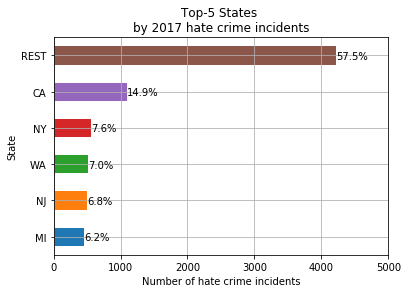

In [85]:
fig0, ax0 = plt.subplots()
ax0 = absolute_rank_2017.plot(kind = 'barh', grid=True, title = "Top-5 States \nby 2017 hate crime incidents")
ax0.set_xlabel("Number of hate crime incidents")
ax0.set_ylabel("State")
ax0.set_xlim(0,5000)


individuals =[]
for i in ax0.patches:
    individuals.append(i.get_width())
    
total = sum(individuals)

for i in ax0.patches:
    ax0.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()/total)*100,1))+'%')

#ax0.invert_yaxis()

fig0.savefig(output_file_path / "fig3.1(top5_states_2017_abs).png")
ax0.get_xlim()

### *<font color=green> Plot1.2: State ranking basis 10 year average of Hate Crime incidents *</font>

In [86]:
absolute_rank_10yr = df_results.pivot_table(index = 'STATE_ABBR', values = 'HATE_CRIMES', aggfunc = np.sum)
series_abs_10Y = absolute_rank_10yr['HATE_CRIMES'].nlargest(5)
REST = absolute_rank_10yr['HATE_CRIMES'].nsmallest(45).sum()

series_abs_10Y.loc['REST'] = REST
series_abs_10Y =series_abs_10Y/10
series_abs_10Y.sort_values(inplace = True)
series_abs_10Y

STATE_ABBR
MA       359.3
MI       403.3
NJ       471.0
NY       601.9
CA       990.5
REST    3355.5
Name: HATE_CRIMES, dtype: float64

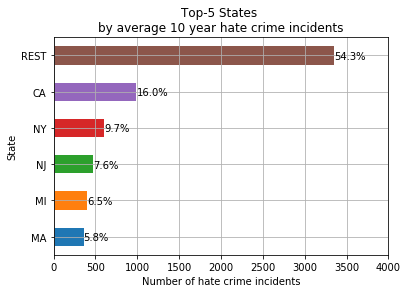

In [87]:
fig1, ax1 = plt.subplots()
ax1 = series_abs_10Y.plot(kind = 'barh', grid=True, title = "Top-5 States \nby average 10 year hate crime incidents")
ax1.set_xlabel("Number of hate crime incidents")
ax1.set_ylabel("State")
ax1.set_xlim(0,4000)


individuals =[]
for i in ax1.patches:
    individuals.append(i.get_width())
    
total = sum(individuals)

for i in ax1.patches:
    ax1.text(i.get_width()+.3, i.get_y()+.15, \
            str(round((i.get_width()/total)*100,1))+'%')

fig1.savefig(output_file_path / "fig3.2(top5_states_10yr_avg).png")


### *<font color=green> Plot1.3: State ranking basis  2017 hate incidents per 100K population *</font>

In [88]:
temp = df_results.set_index('STATE_ABBR')
per_100k_rank_2017 = temp.loc[temp['DATA_YEAR'] == 2017,:]
# per_100k_rank_2017['HATE_CRIMES_100K'].nlargest(5)

# getting data for rest of the states to categorize under 'REST'
hate_crimes_5 = per_100k_rank_2017['HATE_CRIMES'].nlargest(5).sum()
hate_crimes_rest = per_100k_rank_2017['HATE_CRIMES'].nsmallest(45).sum()

top_5_list = per_100k_rank_2017['HATE_CRIMES_100K'].nlargest(5).index.tolist()

pop_5 = per_100k_rank_2017.loc[top_5_list,'STATE_POPULATION'].sum()
pop_rest = per_100k_rank_2017.loc[:, 'STATE_POPULATION'].sum() - pop_5
pop = per_100k_rank_2017['STATE_POPULATION'].sum()

REST = hate_crimes_rest/(pop_rest/100000)


# Adding REST of states category data 
per_100k_rank_2017 = per_100k_rank_2017['HATE_CRIMES_100K'].nlargest(5)
per_100k_rank_2017.loc['REST'] = REST
per_100k_rank_2017 = round (per_100k_rank_2017,2)
per_100k_rank_2017.sort_values(inplace = True)

print (hate_crimes_5, hate_crimes_rest)
print (pop_5, pop_rest)

3115 4219
28419367.0 295872273.0


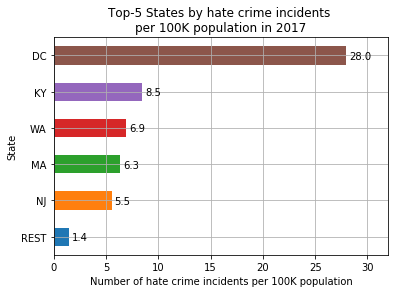

In [89]:
fig2, ax2 = plt.subplots()
ax2 =per_100k_rank_2017.plot(kind = 'barh', grid=True, title = "Top-5 States by hate crime incidents \nper 100K population in 2017")
ax2.set_xlabel("Number of hate crime incidents per 100K population")
ax2.set_ylabel("State")
ax2.set_xlim(0,32)

for i in ax2.patches:
    ax2.text(i.get_width()+.3, i.get_y()+.15, str(round(i.get_width(),1)))

fig2.savefig(output_file_path / "fig3.3(hate_crime_2017_per100K_population).png")

### *<font color=green> Plot1.4: State ranking basis 10 year average of  Hate Crime incidents per 100K population *</font>

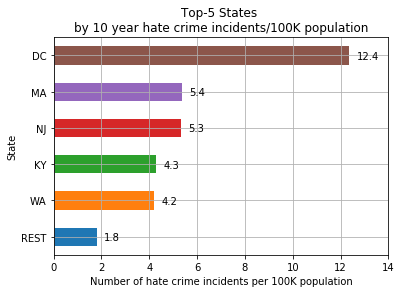

In [90]:
per100k_rank_10yr = df_results.pivot_table(index = 'STATE_ABBR', values = 'HATE_CRIMES_100K', aggfunc = np.mean)
series_per100k_10Y = per100k_rank_10yr['HATE_CRIMES_100K'].nlargest(5)
#REST = per100k_rank_10yr['HATE_CRIMES_100K'].nsmallest(45).mean()

templist = series_per100k_10Y.index.tolist()
tempdf = df_results.pivot_table(index = 'STATE_ABBR', values = ['HATE_CRIMES', 'STATE_POPULATION'], aggfunc = np.sum)
tempdf.drop(templist, axis = 0, inplace = True)

REST = tempdf['HATE_CRIMES'].sum()/(tempdf['STATE_POPULATION'].sum()/100000)
series_per100k_10Y.loc['REST'] = REST
series_per100k_10Y.sort_values(inplace = True)

fig3, ax3 = plt.subplots()
ax3 =series_per100k_10Y.plot(kind = 'barh', grid=True, title = "Top-5 States \nby 10 year hate crime incidents/100K population")
ax3.set_xlabel("Number of hate crime incidents per 100K population")
ax3.set_ylabel("State")
ax3.set_xlim(0,14)

for i in ax3.patches:
    ax3.text(i.get_width()+.3, i.get_y()+.15, str(round(i.get_width(),1)))


fig3.savefig(output_file_path / "fig3.4(top5_states_10yr_per100k).png")

### *<font color=green> Plot1.5: Hate crimes per 100K population- 3 year Moving averages of top5 3YMA states in 2017 *</font>


In [91]:
temp1 = df_results.pivot_table(index ='DATA_YEAR', values = 'HATE_CRIMES_100K', columns = 'STATE_ABBR')
temp1.head(10)

STATE_ABBR,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
DATA_YEAR,,,,,,,,,,,,,,,,,,,,,
2008,1.165683,0.235955,3.221977,2.846075,3.759862,3.320204,5.112457,7.096597,7.101199,0.834773,...,5.471317,4.344407,1.015334,1.461762,3.436696,3.541133,3.664556,1.687999,2.535178,1.126405
2009,1.288525,0.191135,2.595650,3.320306,2.754205,4.139511,5.684583,6.170194,4.180215,0.701263,...,5.169975,2.715901,0.665798,1.759696,1.902928,3.860010,3.121157,0.954945,1.373795,1.469859
2010,0.980192,0.397041,2.156362,3.679934,2.924619,3.050899,4.111315,9.422858,2.222736,0.721922,...,6.245423,2.312253,0.689014,2.269878,2.180970,2.716050,3.440631,1.633970,1.779582,0.354262
2011,1.105186,1.727839,1.225081,2.984237,2.759797,3.635438,3.959052,13.408291,1.761849,0.644578,...,2.671222,2.312577,0.596915,2.451723,1.813833,1.436341,3.121672,1.383576,1.024310,0.352512
2012,0.821572,0.124545,1.728914,2.686552,2.394745,3.641999,4.148378,11.366740,1.090450,0.745313,...,3.596920,4.972955,0.671507,3.572841,1.685676,2.236590,3.973711,1.205334,1.454209,0.346845
2013,1.085100,0.124121,0.912543,3.029391,2.190917,2.446849,4.000732,11.092094,1.405041,0.607133,...,2.483708,3.155172,0.535735,2.618174,1.487241,2.073845,4.215814,0.870632,3.129055,0.171461
2014,0.814060,0.185704,0.337060,3.938305,1.956574,1.755176,3.477282,10.608697,1.388936,0.326542,...,2.109448,3.023926,0.585639,1.867891,1.476928,2.393234,4.304019,0.902867,1.568627,NaN
2015,1.084438,0.206021,0.167906,4.048366,2.146487,1.963728,2.594338,9.696037,1.165160,0.355645,...,1.864978,3.350995,0.696327,1.571574,1.888239,1.277776,3.840627,0.745506,2.226986,0.340974
2016,1.483435,0.288034,0.401575,3.140994,2.369169,1.898698,3.010298,16.804611,1.574476,0.532518,...,2.089277,2.240802,0.641465,2.200819,1.509321,4.010562,5.425128,0.675568,2.242107,0.512899


In [92]:
# Creating another dataframe with 3 year moving averages
temp2 = temp1.rolling(window =3).mean()

In [93]:
temp2.head()

STATE_ABBR,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
DATA_YEAR,,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,1.144800,0.274710,2.657996,3.282105,3.146229,3.503538,4.969452,7.563216,4.501383,0.752653,...,5.628905,3.124187,0.790049,1.830445,2.506865,3.372398,3.408781,1.425638,1.896185,0.983509
2011,1.124634,0.772005,1.992364,3.328159,2.812874,3.608616,4.584984,9.667114,2.721600,0.689254,...,4.695540,2.446910,0.650576,2.160433,1.965910,2.670800,3.227820,1.324164,1.392562,0.725544
2012,0.968983,0.749808,1.703452,3.116908,2.693053,3.442779,4.072915,11.399296,1.691678,0.703937,...,4.171188,3.199262,0.652479,2.764814,1.893493,2.129660,3.512004,1.407627,1.419367,0.351207


In [94]:
temp2.T[2017].nlargest(5)

STATE_ABBR
DC    18.151889
MA     6.052944
KY     5.853132
WA     5.388602
NJ     4.125001
Name: 2017, dtype: float64

In [95]:
state_filter_3yMA = temp2.T[2017].nlargest(5).index.tolist()
state_filter_3yMA

['DC', 'MA', 'KY', 'WA', 'NJ']

In [96]:
x = temp2.index.tolist()[2:] # discarding 2008 & 2009 as irrelevant for 3 year MA
y =[]
for state in state_filter_3yMA:
    y.append(temp2[state].tolist()[2:])
y[0]

[7.56321622261741,
 9.667114228491434,
 11.399296232069352,
 11.95570804780918,
 11.022510108716936,
 10.465609020746454,
 12.369781338266074,
 18.151888555477758]

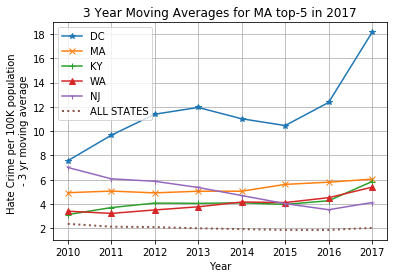

In [97]:
fig4, ax4 = plt.subplots()
markers= ['*', 'x', '+', '^', '1']
for n in range (len(y)):
    ax4.plot(x,y[n], marker= markers[n], label = state_filter_3yMA[n])
    
country = df_results.pivot_table(index ='DATA_YEAR', values = ['HATE_CRIMES', 'STATE_POPULATION'], aggfunc = np.sum)
country['per100K'] = round(country.HATE_CRIMES/(country.STATE_POPULATION/100000),1)
country = country.per100K.rolling(window =3).mean()[2:10]
ax4.plot(x,country , label = 'ALL STATES', linewidth = 2, linestyle = ':')
ax4.legend(loc='best')
ax4.set_xlabel("Year")
ax4.set_ylabel("Hate Crime per 100K population \n - 3 yr moving average")
ax4.set_xticks(x)
ax4.grid(True)
ax4.set_title("3 Year Moving Averages for MA top-5 in 2017")
fig4.savefig(output_file_path/ 'fig3.5(3Y MA of Hate Crime per 100K population for top-5 in 2017 MA).png')

### *<font color=green> Plot1.6: Hate crimes per 100K population- 3 year Moving averages of top- 5 states in 2017 by absolute hate crime incidents *</font>

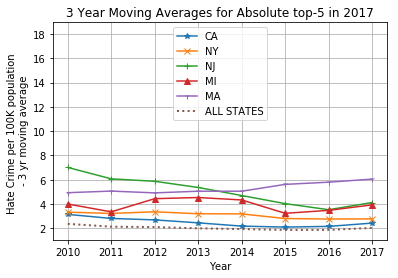

In [98]:
state_filter = absolute_rank_10yr['HATE_CRIMES'].nlargest().index.tolist()
x = temp2.index.tolist()[2:] # discarding 2008 & 2009 as irrelevant for 3 year MA
y1 =[]
for state in state_filter:
    y1.append(temp2[state].tolist()[2:])

    
fig5, ax5 = plt.subplots()
markers= ['*', 'x', '+', '^', '1']
for n in range (len(y1)):
    ax5.plot(x,y1[n], marker= markers[n], label = state_filter[n])
ax5.plot(x,country , label = 'ALL STATES', linewidth = 2, linestyle = ':')
ax5.legend(loc='upper center')
ax5.set_xlabel("Year")
ax5.set_ylabel("Hate Crime per 100K population \n - 3 yr moving average")
ax5.set_xticks(x)
ax5.grid(True)
ax5.set_ylim(ax4.get_ylim()) # setting scales same as previous chart
ax5.set_title("3 Year Moving Averages for Absolute top-5 in 2017")
fig5.savefig(output_file_path/ 'fig3.6(3Y MA of Hate Crime per 100K population for absolute top-5 in 2017).png')

### 3.2 Analysis of Hate-crime locations

In [99]:
df_locations = df.pivot_table(index = ['LOCATION'], columns ='DATA_YEAR', values = ['INCIDENT_ID'], aggfunc = np.size)
df_locations


INCIDENT_ID                                \
DATA_YEAR                                 2008  2009  2010  2011  2012  2013   
LOCATION                                                                       
 Others                                   1303  1168  1209   956  1084  1072   
Educational institution                    936   756   724   585   624   504   
Highway/Road/Alley/Street/Sidewalk        1392  1128  1133  1123  1155  1097   
Parking/Drop Lot/Garage                    482   403   386   368   378   341   
Places of worship                          337   284   244   278   266   214   
Public utility places                      408   298   340   327   350   337   
Recreation places                          334   251   269   328   307   328   
Residence/Home                            2551  2082  2079  2044  2122  1906   
Shopping places                            296   242   244   290   307   245   

                                                            
DATA_YEAR                           2014  2015  2016  2017  
LOCATION                                                    
 Others                              862   911  1073  1217  
Educational institution              484   484   610   778  
Highway/Road/Alley/Street/Sidewalk   997  1025  1155  1229  
Parking/Drop Lot/Garage              350   329   364   430  
Places of worship                    200   260   245   295  
Public utility places                370   387   425   509  
Recreation places                    294   340   366   460  
Residence/Home                      1777  1844  1731  2017  
Shopping places                      263   280   294   399

In [100]:
df_locations_T = df_locations.T
df_locations_T

LOCATION                Others  Educational institution  \
            DATA_YEAR                                     
INCIDENT_ID 2008          1303                      936   
            2009          1168                      756   
            2010          1209                      724   
            2011           956                      585   
            2012          1084                      624   
            2013          1072                      504   
            2014           862                      484   
            2015           911                      484   
            2016          1073                      610   
            2017          1217                      778   

LOCATION               Highway/Road/Alley/Street/Sidewalk  \
            DATA_YEAR                                       
INCIDENT_ID 2008                                     1392   
            2009                                     1128   
            2010                                     1133   
            2011                                     1123   
            2012                                     1155   
            2013                                     1097   
            2014                                      997   
            2015                                     1025   
            2016                                     1155   
            2017                                     1229   

LOCATION               Parking/Drop Lot/Garage  Places of worship  \
            DATA_YEAR                                               
INCIDENT_ID 2008                           482                337   
            2009                           403                284   
            2010                           386                244   
            2011                           368                278   
            2012                           378                266   
            2013                           341                214   
            2014                           350                200   
            2015                           329                260   
            2016                           364                245   
            2017                           430                295   

LOCATION               Public utility places  Recreation places  \
            DATA_YEAR                                             
INCIDENT_ID 2008                         408                334   
            2009                         298                251   
            2010                         340                269   
            2011                         327                328   
            2012                         350                307   
            2013                         337                328   
            2014                         370                294   
            2015                         387                340   
            2016                         425                366   
            2017                         509                460   

LOCATION               Residence/Home  Shopping places  
            DATA_YEAR                                   
INCIDENT_ID 2008                 2551              296  
            2009                 2082              242  
            2010                 2079              244  
            2011                 2044              290  
            2012                 2122              307  
            2013                 1906              245  
            2014                 1777              263  
            2015                 1844              280  
            2016                 1731              294  
            2017                 2017              399

In [101]:
location_filter = df_locations_T.columns.tolist()
location_filter

[' Others',
 'Educational institution',
 'Highway/Road/Alley/Street/Sidewalk',
 'Parking/Drop Lot/Garage',
 'Places of worship',
 'Public utility places',
 'Recreation places',
 'Residence/Home',
 'Shopping places']

### *<font color=green> Plot2.1: Hate crimes locations - 10 year data *</font>

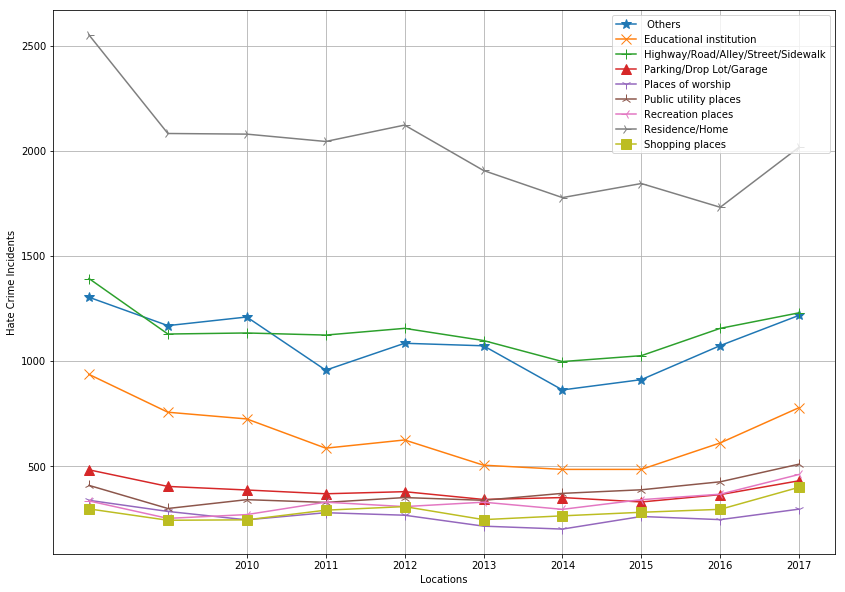

In [102]:
fig6, ax6 = plt.subplots(figsize = (14,10))
markers= ['*', 'x', '+', '^', '1', '2', '3', '4', 's','8']
for n in range (len(location_filter)):
    ax6.plot(df.DATA_YEAR.unique().tolist(),df_locations_T[location_filter[n]].tolist(), marker= markers[n], markersize = 10, label = location_filter[n])
ax6.legend(loc='best')
ax6.set_xlabel("Locations")
ax6.set_ylabel("Hate Crime Incidents")
ax6.set_xticks(x)
ax6.grid(True)
fig6.savefig(output_file_path / "fig3.7(Hate crime locations).png")

# Section 4

In [103]:
file = "../input_files/hate_crime_v3.csv"

m_df = pd.read_csv(file, low_memory = False)
m_df = m_df.loc[m_df['DATA_YEAR']>=2007, :]
m_df.head()

,INCIDENT_ID,DATA_YEAR,DATA_MONTH,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,BIAS_TYPE,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
121300,125705,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Simple Assault,2.0,Other/Unknown,Anti-Disability,Anti-Mental Disability,Individual,S,S
121301,125706,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Parking/Drop Lot/Garage,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
121302,125707,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Sexual Orientation,Anti-Gay (Male),Individual,S,S
121303,125708,2007,April,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Simple Assault,2.0,Hotel/Motel/Etc.,Anti-Sexual Orientation,Anti-Gay (Male),Individual,S,S
121304,125709,2007,May,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S


In [104]:
# converting Incident Date to datetime format
m_df['INCIDENT_DATE'] = pd.to_datetime(m_df['INCIDENT_DATE'])
m_df['INCIDENT_DATE'] = pd.DatetimeIndex(m_df['INCIDENT_DATE']).month
months = m_df['INCIDENT_DATE'].unique()
print(months)

[ 3  4  5  6  8  9 10 12 11  7  2  1]


In [105]:
months.sort(kind='quicksort')
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [106]:
month_count = m_df["INCIDENT_DATE"].value_counts()
months_df = pd.DataFrame({"Total": month_count})
months_df = months_df.sort_index()
months_df

,Total
1,5157
2,5072
3,6097
4,6297
5,6722
6,6468
7,6620
8,6636
9,6550
10,6617


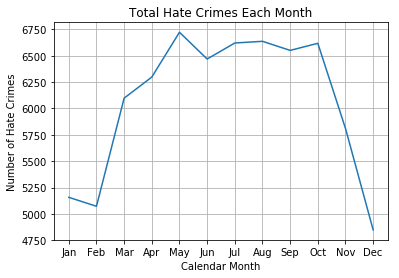

In [107]:
xticks = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, months_df.Total)
plt.title("Total Hate Crimes Each Month")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")
plt.xticks(months, labels=xticks)
plt.grid()


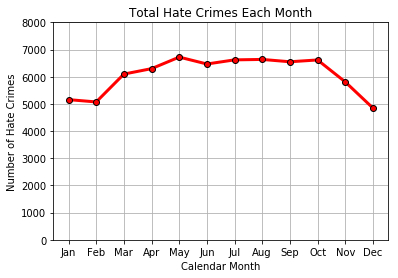

In [108]:
xticks = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, months_df.Total, color='red', linewidth=3, marker='o', markeredgecolor='black')
plt.title("Total Hate Crimes Each Month")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")
plt.xticks(months, labels=xticks)
plt.grid()
plt.ylim(0,8000)
plt.savefig('../output_files/fig4.1(Hate_Crimes_by_Month).png')

In [109]:
year_one = m_df.loc[m_df["DATA_YEAR"] == 2007]
year_one_count = year_one["INCIDENT_DATE"].value_counts()

year_two = m_df.loc[m_df["DATA_YEAR"] == 2008]
year_two_count = year_two["INCIDENT_DATE"].value_counts()

year_three = m_df.loc[m_df["DATA_YEAR"] == 2009]
year_three_count = year_three["INCIDENT_DATE"].value_counts()

year_four = m_df.loc[m_df["DATA_YEAR"] == 2010]
year_four_count = year_four["INCIDENT_DATE"].value_counts()

year_five = m_df.loc[m_df["DATA_YEAR"] == 2011]
year_five_count = year_five["INCIDENT_DATE"].value_counts()

year_six = m_df.loc[m_df["DATA_YEAR"] == 2012]
year_six_count = year_six["INCIDENT_DATE"].value_counts()

year_seven = m_df.loc[m_df["DATA_YEAR"] == 2013]
year_seven_count = year_seven["INCIDENT_DATE"].value_counts()

year_eight = m_df.loc[m_df["DATA_YEAR"] == 2014]
year_eight_count = year_eight["INCIDENT_DATE"].value_counts()

year_nine = m_df.loc[m_df["DATA_YEAR"] == 2015]
year_nine_count = year_nine["INCIDENT_DATE"].value_counts()

year_ten = m_df.loc[m_df["DATA_YEAR"] == 2016]
year_ten_count = year_ten["INCIDENT_DATE"].value_counts()

year_eleven = m_df.loc[m_df["DATA_YEAR"] == 2017]
year_eleven_count = year_eleven["INCIDENT_DATE"].value_counts()

In [110]:
m_summary_df = pd.DataFrame({"2007": year_one_count,
                          "2008": year_two_count,
                          "2009": year_three_count,
                          "2010": year_four_count,
                          "2011": year_five_count,
                          "2012": year_six_count,
                          "2013": year_seven_count,
                          "2014": year_eight_count,
                          "2015": year_nine_count,
                          "2016": year_ten_count,
                          "2017": year_eleven_count})
m_summary_df = m_summary_df.sort_index()
m_summary_df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,550,577,478,474,438,560,404,327,410,382,557
2,482,614,491,437,386,544,400,389,364,384,581
3,630,693,565,600,518,589,483,441,436,495,647
4,678,698,549,663,544,577,529,489,512,489,569
5,718,745,615,613,593,629,569,520,561,492,667
6,683,689,591,538,557,571,574,511,562,539,653
7,686,714,557,558,560,611,604,513,593,613,611
8,657,693,639,619,576,568,584,562,542,521,675
9,748,708,594,657,555,590,518,508,485,535,652
10,740,737,628,634,588,518,526,559,473,564,650


Text(0.5, 0, 'Calendar Month')

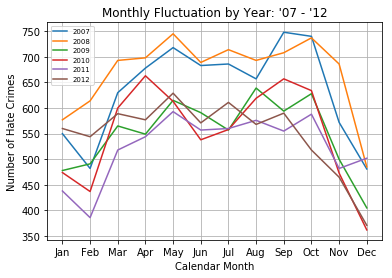

In [111]:
xticks = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, m_summary_df["2007"])
plt.plot(months, m_summary_df["2008"])
plt.plot(months, m_summary_df["2009"])
plt.plot(months, m_summary_df["2010"])
plt.plot(months, m_summary_df["2011"])
plt.plot(months, m_summary_df["2012"])
plt.xticks(months, labels=xticks, rotation="horizontal")
plt.grid()
plt.legend(fontsize="x-small", loc=2)
plt.title("Monthly Fluctuation by Year: '07 - '12")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")

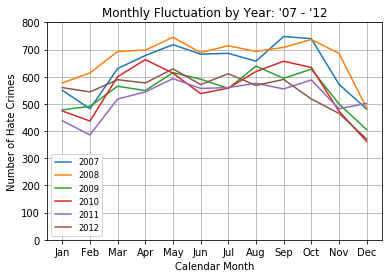

In [112]:
plt.plot(months, m_summary_df["2007"])
plt.plot(months, m_summary_df["2008"])
plt.plot(months, m_summary_df["2009"])
plt.plot(months, m_summary_df["2010"])
plt.plot(months, m_summary_df["2011"])
plt.plot(months, m_summary_df["2012"])
plt.xticks(months, labels=xticks, rotation="horizontal")
plt.grid()
plt.legend(fontsize="small", loc=0)
plt.ylim(0,800)
plt.title("Monthly Fluctuation by Year: '07 - '12")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")
plt.savefig('../output_files/fig4.2(Month_and_Year_Breakdown_07_to_12).png')

Text(0.5, 0, 'Calendar Month')

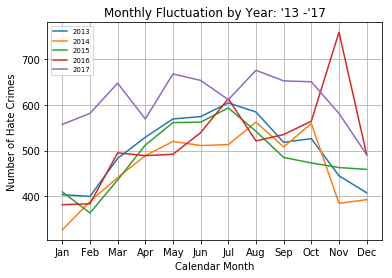

In [113]:
plt.plot(months, m_summary_df["2013"])
plt.plot(months, m_summary_df["2014"])
plt.plot(months, m_summary_df["2015"])
plt.plot(months, m_summary_df["2016"])
plt.plot(months, m_summary_df["2017"])
plt.xticks(months, labels=xticks, rotation="horizontal")
plt.grid()
plt.legend(fontsize="x-small", loc=2)
plt.title("Monthly Fluctuation by Year: '13 -'17")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")

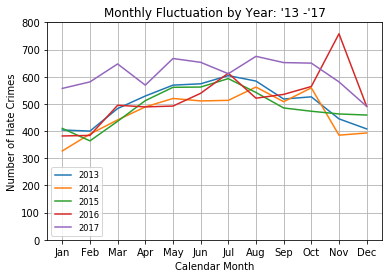

In [114]:
plt.plot(months, m_summary_df["2013"])
plt.plot(months, m_summary_df["2014"])
plt.plot(months, m_summary_df["2015"])
plt.plot(months, m_summary_df["2016"])
plt.plot(months, m_summary_df["2017"])
plt.xticks(months, labels=xticks, rotation="horizontal")
plt.grid()
plt.legend(fontsize="small", loc=0)
plt.ylim(0,800)
plt.title("Monthly Fluctuation by Year: '13 -'17")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")
plt.savefig('../output_files/fig4.3(Month_and_Year_Breakdown_13_to_17).png')